In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [10]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

y_train_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_train ])
y_test_parity = np.array([np.sum(np.array(list(map(int, str(y))))) % 2 for y in y_test ])


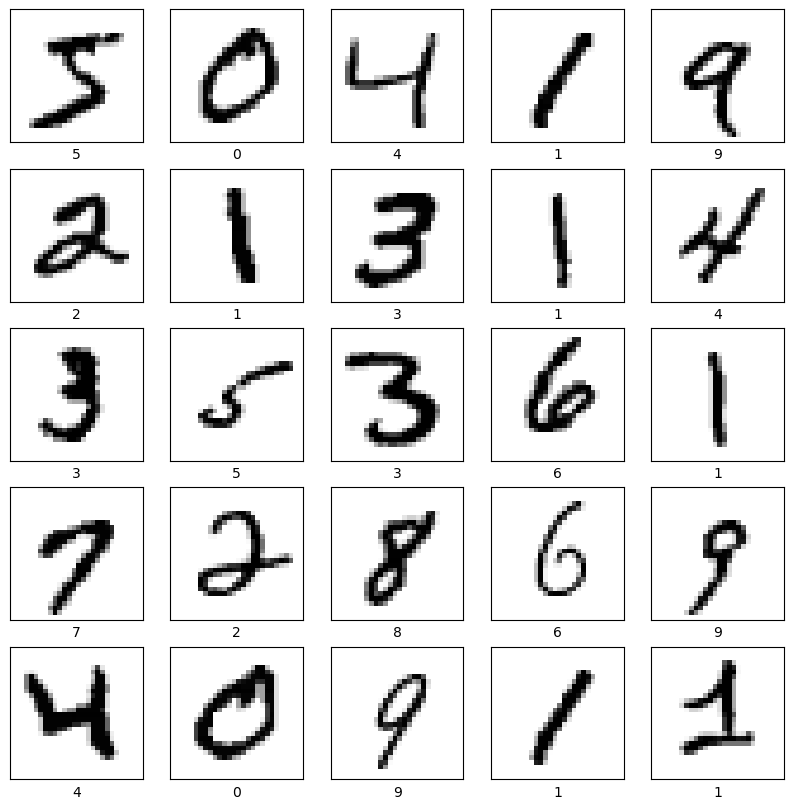

In [13]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(y_train[i])
    
plt.show()

In [28]:
inputs = keras.Input(shape = (28, 28))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation = 'relu')(x)
outputs = layers.Dense(10, activation = 'softmax')(x)
outputs_parity = layers.Dense(1, activation = 'sigmoid')(x)

In [29]:
model = keras.Model(inputs = inputs, outputs = [outputs, outputs_parity])

model.compile(optimizer = 'adam', loss = ['sparse_categorical_crossentropy', 'binary_crossentropy'], metrics = [['accuracy'], ['accuracy']])

In [30]:
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
history = model.fit(X_train, [y_train, y_train_parity], epochs = 20, validation_split = 0.2, callbacks = [early_stopping])

early_stopping_epoch = np.argmin(history.history['val_loss']) + 1
print("Early stopping occured at epoch : ", early_stopping_epoch)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - dense_7_accuracy: 0.8580 - dense_8_accuracy: 0.9009 - loss: 0.7370 - val_dense_7_accuracy: 0.9532 - val_dense_8_accuracy: 0.9677 - val_loss: 0.2549
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dense_7_accuracy: 0.9577 - dense_8_accuracy: 0.9726 - loss: 0.2208 - val_dense_7_accuracy: 0.9666 - val_dense_8_accuracy: 0.9773 - val_loss: 0.1849
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dense_7_accuracy: 0.9725 - dense_8_accuracy: 0.9799 - loss: 0.1549 - val_dense_7_accuracy: 0.9690 - val_dense_8_accuracy: 0.9767 - val_loss: 0.1725
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dense_7_accuracy: 0.9808 - dense_8_accuracy: 0.9851 - loss: 0.1119 - val_dense_7_accuracy: 0.9674 - val_dense_8_accuracy: 0.9798 - val_loss: 0.1667
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dense_7_accuracy: 0.9849 - dense_8_accuracy: 0.9879 - loss: 0.0881 - val_dense_7_accuracy: 0.9718 - val_dense_8_accuracy: 0.9813

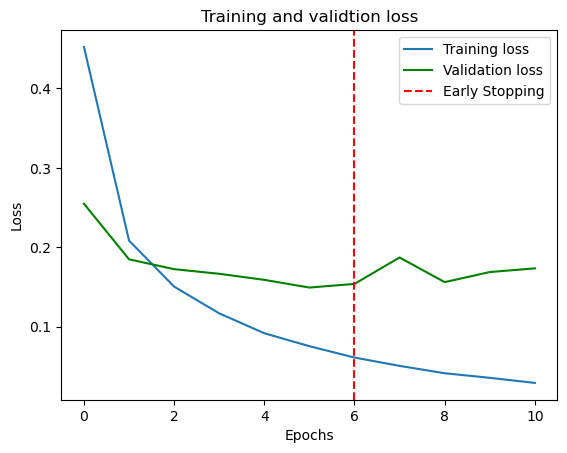

In [31]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'],color = 'green',  label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validtion loss')
plt.axvline(x = early_stopping_epoch, color = 'red', linestyle = '--', label = 'Early Stopping')
plt.legend()
plt.show()